<a href="https://colab.research.google.com/github/HeydarAbdurahmanov/HeydarAbdurahmanov/blob/main/CAR_PRICE_PREDICTION_TURBO_AZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [329]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [330]:
# loading the data from csv file to pandas dataframe
df = pd.read_excel('/content/Azərbaycan - Turbo.Az.xlsx')

In [331]:
# inspecting the first 5 rows of the dataframe
df.head()

,Title,City,Brand,Model_Name,Production_year,Ban_type,Color,Engine,H.P,Fuel,Gear_box,Transmission,Condition,Price,Currency
0,"Chery Tiggo 2 Pro, 1.5 L, 2022 il, yeni",Bakı,Chery,Tiggo 2 Pro,2022,SUV,Orange,1.5 L,109,Benzine,Automatic,Front,yes,31 900,AZN
1,"Land Rover Defender, 3.0 L, 2022 il, 3 000 km",Bakı,Land Rover,Defender,2022,SUV,Black,3.0 L,400,Benzine,Automatic,Full,no,128 500,USD
2,"LADA (VAZ) Granta, 1.6 L, 2022 il, yeni",Bakı,LADA (VAZ),Granta,2022,Sedan,Red,1.6 L,87,Benzine,Manual,Front,yes,21 700,AZN
3,"Opel Mokka, 1.2 L, 2022 il, yeni",Bakı,Opel,Mokka,2022,SUV,Green,1.2 L,130,Benzine,Automatic,Front,yes,48 900,AZN
4,"Lexus IS 250, 2.5 L, 2006 il, 197 500 km",Bakı,Lexus,IS 250,2006,Sedan,Blue,2.5 L,208,Benzine,Automatic,Full,no,14 000,AZN


In [332]:
# checking the number of rows and columns
df.shape

(2189, 15)

In [333]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189 entries, 0 to 2188
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            2189 non-null   object
 1   City             2189 non-null   object
 2   Brand            2189 non-null   object
 3   Model_Name       2189 non-null   object
 4   Production_year  2189 non-null   int64 
 5   Ban_type         2189 non-null   object
 6   Color            2189 non-null   object
 7   Engine           2189 non-null   object
 8   H.P              2189 non-null   int64 
 9   Fuel             2189 non-null   object
 10  Gear_box         2189 non-null   object
 11  Transmission     2189 non-null   object
 12  Condition        2189 non-null   object
 13  Price            2189 non-null   object
 14  Currency         2189 non-null   object
dtypes: int64(2), object(13)
memory usage: 256.6+ KB


In [334]:
# checking the number of missing values
df.isnull().sum()

Title              0
City               0
Brand              0
Model_Name         0
Production_year    0
Ban_type           0
Color              0
Engine             0
H.P                0
Fuel               0
Gear_box           0
Transmission       0
Condition          0
Price              0
Currency           0
dtype: int64

In [335]:
df

,Title,City,Brand,Model_Name,Production_year,Ban_type,Color,Engine,H.P,Fuel,Gear_box,Transmission,Condition,Price,Currency
0,"Chery Tiggo 2 Pro, 1.5 L, 2022 il, yeni",Bakı,Chery,Tiggo 2 Pro,2022,SUV,Orange,1.5 L,109,Benzine,Automatic,Front,yes,31 900,AZN
1,"Land Rover Defender, 3.0 L, 2022 il, 3 000 km",Bakı,Land Rover,Defender,2022,SUV,Black,3.0 L,400,Benzine,Automatic,Full,no,128 500,USD
2,"LADA (VAZ) Granta, 1.6 L, 2022 il, yeni",Bakı,LADA (VAZ),Granta,2022,Sedan,Red,1.6 L,87,Benzine,Manual,Front,yes,21 700,AZN
3,"Opel Mokka, 1.2 L, 2022 il, yeni",Bakı,Opel,Mokka,2022,SUV,Green,1.2 L,130,Benzine,Automatic,Front,yes,48 900,AZN
4,"Lexus IS 250, 2.5 L, 2006 il, 197 500 km",Bakı,Lexus,IS 250,2006,Sedan,Blue,2.5 L,208,Benzine,Automatic,Full,no,14 000,AZN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2184,"Audi A6, 2.8 L, 2010 il, 300 000 km",Bakı,Audi,A6,2010,Sedan,Black,2.8 L,220,Benzine,Automatic,Front,no,23 000,AZN
2185,"Honda Insight, 1.3 L, 2011 il, 240 000 km",Bakı,Honda,Insight,2011,Liftback,Blue,1.3 L,88,Hybrid,Automatic,Front,no,18 500,AZN
2186,"Opel Astra, 1.6 L, 1998 il, 372 000 km",Bakı,Opel,Astra,1998,Hatchback,Silver,1.6 L,101,Benzine,Automatic,Front,no,9 400,AZN
2187,"LADA (VAZ) 2107, 1.5 L, 1999 il, 230 000 km",Bakı,LADA (VAZ),2107,1999,Sedan,White,1.5 L,65,Benzine,Manual,Back,no,3 700,AZN


In [336]:
# Convert the 'Price' column to string
df['Price'] = df['Price'].astype(str)

# Remove the space from the 'Price' column
df['Price'] = df['Price'].str.replace(' ', '')

# Convert the 'Price' column to numeric type
df['Price'] = pd.to_numeric(df['Price'])
df

,Title,City,Brand,Model_Name,Production_year,Ban_type,Color,Engine,H.P,Fuel,Gear_box,Transmission,Condition,Price,Currency
0,"Chery Tiggo 2 Pro, 1.5 L, 2022 il, yeni",Bakı,Chery,Tiggo 2 Pro,2022,SUV,Orange,1.5 L,109,Benzine,Automatic,Front,yes,31900,AZN
1,"Land Rover Defender, 3.0 L, 2022 il, 3 000 km",Bakı,Land Rover,Defender,2022,SUV,Black,3.0 L,400,Benzine,Automatic,Full,no,128500,USD
2,"LADA (VAZ) Granta, 1.6 L, 2022 il, yeni",Bakı,LADA (VAZ),Granta,2022,Sedan,Red,1.6 L,87,Benzine,Manual,Front,yes,21700,AZN
3,"Opel Mokka, 1.2 L, 2022 il, yeni",Bakı,Opel,Mokka,2022,SUV,Green,1.2 L,130,Benzine,Automatic,Front,yes,48900,AZN
4,"Lexus IS 250, 2.5 L, 2006 il, 197 500 km",Bakı,Lexus,IS 250,2006,Sedan,Blue,2.5 L,208,Benzine,Automatic,Full,no,14000,AZN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2184,"Audi A6, 2.8 L, 2010 il, 300 000 km",Bakı,Audi,A6,2010,Sedan,Black,2.8 L,220,Benzine,Automatic,Front,no,23000,AZN
2185,"Honda Insight, 1.3 L, 2011 il, 240 000 km",Bakı,Honda,Insight,2011,Liftback,Blue,1.3 L,88,Hybrid,Automatic,Front,no,18500,AZN
2186,"Opel Astra, 1.6 L, 1998 il, 372 000 km",Bakı,Opel,Astra,1998,Hatchback,Silver,1.6 L,101,Benzine,Automatic,Front,no,9400,AZN
2187,"LADA (VAZ) 2107, 1.5 L, 1999 il, 230 000 km",Bakı,LADA (VAZ),2107,1999,Sedan,White,1.5 L,65,Benzine,Manual,Back,no,3700,AZN


In [337]:
# Defining the usd_to_azn function
def usd_to_azn(amount_usd, exchange_rate):
    amount_azn = amount_usd * exchange_rate
    return amount_azn

# Defining the exchange rate
exchange_rate = 1.7

# Applying the usd_to_azn function to the 'Price' column based on 'Currency'
df['Price_AZN'] = df.apply(lambda row: usd_to_azn(row['Price'], exchange_rate) if row['Currency'] == 'USD' else row['Price'], axis=1,)
df

,Title,City,Brand,Model_Name,Production_year,Ban_type,Color,Engine,H.P,Fuel,Gear_box,Transmission,Condition,Price,Currency,Price_AZN
0,"Chery Tiggo 2 Pro, 1.5 L, 2022 il, yeni",Bakı,Chery,Tiggo 2 Pro,2022,SUV,Orange,1.5 L,109,Benzine,Automatic,Front,yes,31900,AZN,31900.0
1,"Land Rover Defender, 3.0 L, 2022 il, 3 000 km",Bakı,Land Rover,Defender,2022,SUV,Black,3.0 L,400,Benzine,Automatic,Full,no,128500,USD,218450.0
2,"LADA (VAZ) Granta, 1.6 L, 2022 il, yeni",Bakı,LADA (VAZ),Granta,2022,Sedan,Red,1.6 L,87,Benzine,Manual,Front,yes,21700,AZN,21700.0
3,"Opel Mokka, 1.2 L, 2022 il, yeni",Bakı,Opel,Mokka,2022,SUV,Green,1.2 L,130,Benzine,Automatic,Front,yes,48900,AZN,48900.0
4,"Lexus IS 250, 2.5 L, 2006 il, 197 500 km",Bakı,Lexus,IS 250,2006,Sedan,Blue,2.5 L,208,Benzine,Automatic,Full,no,14000,AZN,14000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2184,"Audi A6, 2.8 L, 2010 il, 300 000 km",Bakı,Audi,A6,2010,Sedan,Black,2.8 L,220,Benzine,Automatic,Front,no,23000,AZN,23000.0
2185,"Honda Insight, 1.3 L, 2011 il, 240 000 km",Bakı,Honda,Insight,2011,Liftback,Blue,1.3 L,88,Hybrid,Automatic,Front,no,18500,AZN,18500.0
2186,"Opel Astra, 1.6 L, 1998 il, 372 000 km",Bakı,Opel,Astra,1998,Hatchback,Silver,1.6 L,101,Benzine,Automatic,Front,no,9400,AZN,9400.0
2187,"LADA (VAZ) 2107, 1.5 L, 1999 il, 230 000 km",Bakı,LADA (VAZ),2107,1999,Sedan,White,1.5 L,65,Benzine,Manual,Back,no,3700,AZN,3700.0


In [338]:
df = df.drop(['Title', 'Brand','City','Color','Currency','Price'], axis=1)
df

,Model_Name,Production_year,Ban_type,Engine,H.P,Fuel,Gear_box,Transmission,Condition,Price_AZN
0,Tiggo 2 Pro,2022,SUV,1.5 L,109,Benzine,Automatic,Front,yes,31900.0
1,Defender,2022,SUV,3.0 L,400,Benzine,Automatic,Full,no,218450.0
2,Granta,2022,Sedan,1.6 L,87,Benzine,Manual,Front,yes,21700.0
3,Mokka,2022,SUV,1.2 L,130,Benzine,Automatic,Front,yes,48900.0
4,IS 250,2006,Sedan,2.5 L,208,Benzine,Automatic,Full,no,14000.0
...,...,...,...,...,...,...,...,...,...,...
2184,A6,2010,Sedan,2.8 L,220,Benzine,Automatic,Front,no,23000.0
2185,Insight,2011,Liftback,1.3 L,88,Hybrid,Automatic,Front,no,18500.0
2186,Astra,1998,Hatchback,1.6 L,101,Benzine,Automatic,Front,no,9400.0
2187,2107,1999,Sedan,1.5 L,65,Benzine,Manual,Back,no,3700.0


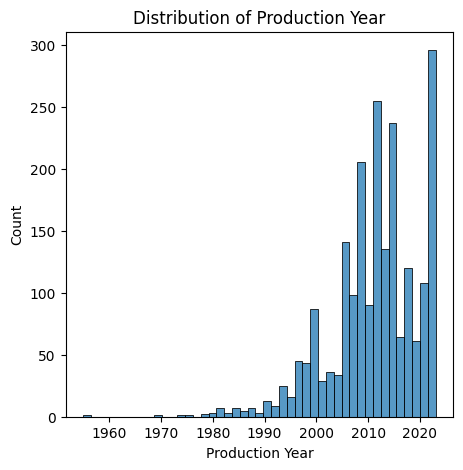

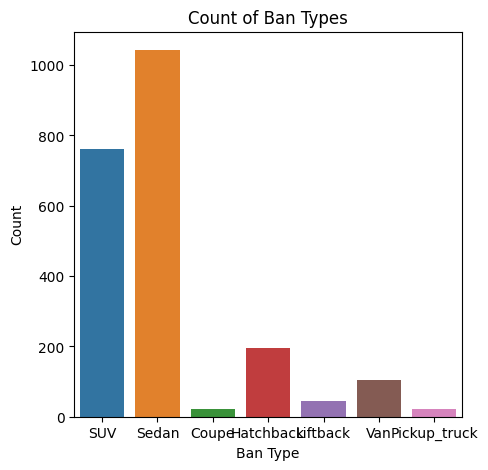

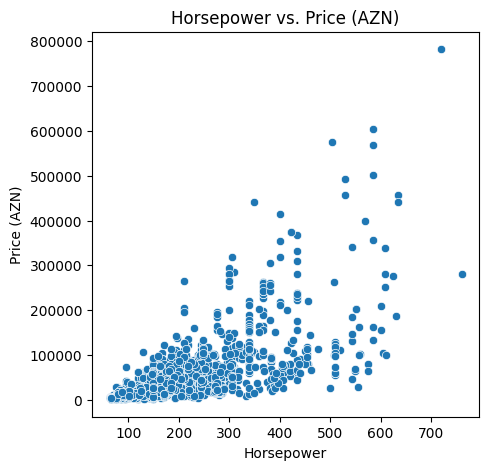

In [339]:
# Plotting a histogram of the 'Production_year' column
plt.figure(figsize=(5, 5))
sns.histplot(data=df, x='Production_year')
plt.title('Distribution of Production Year')
plt.xlabel('Production Year')
plt.ylabel('Count')
plt.show()

# Plotting a bar chart of the 'Ban_type' column
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='Ban_type')
plt.title('Count of Ban Types')
plt.xlabel('Ban Type')
plt.ylabel('Count')
plt.show()

# Plotting a scatter plot of 'H.P' versus 'Price_AZN'
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df, x='H.P', y='Price_AZN')
plt.title('Horsepower vs. Price (AZN)')
plt.xlabel('Horsepower')
plt.ylabel('Price (AZN)')
plt.show()


In [340]:
# Striping 'L' from the values in the 'Engine' column
df['Engine'] = df['Engine'].str.replace('L', '')
df

,Model_Name,Production_year,Ban_type,Engine,H.P,Fuel,Gear_box,Transmission,Condition,Price_AZN
0,Tiggo 2 Pro,2022,SUV,1.5,109,Benzine,Automatic,Front,yes,31900.0
1,Defender,2022,SUV,3.0,400,Benzine,Automatic,Full,no,218450.0
2,Granta,2022,Sedan,1.6,87,Benzine,Manual,Front,yes,21700.0
3,Mokka,2022,SUV,1.2,130,Benzine,Automatic,Front,yes,48900.0
4,IS 250,2006,Sedan,2.5,208,Benzine,Automatic,Full,no,14000.0
...,...,...,...,...,...,...,...,...,...,...
2184,A6,2010,Sedan,2.8,220,Benzine,Automatic,Front,no,23000.0
2185,Insight,2011,Liftback,1.3,88,Hybrid,Automatic,Front,no,18500.0
2186,Astra,1998,Hatchback,1.6,101,Benzine,Automatic,Front,no,9400.0
2187,2107,1999,Sedan,1.5,65,Benzine,Manual,Back,no,3700.0


In [341]:
# checking the distribution of categorical data
print(df.Fuel.value_counts())
print(df.Gear_box.value_counts())
print(df.Transmission.value_counts())
print(df.Condition.value_counts())
print(df.Ban_type.value_counts())

Benzine     1568
Diesel       470
Hybrid       121
Electric      30
Name: Fuel, dtype: int64
Automatic    1690
Manual        499
Name: Gear_box, dtype: int64
Front    975
Full     633
Back     581
Name: Transmission, dtype: int64
no     1919
yes     270
Name: Condition, dtype: int64
Sedan           1043
SUV              760
Hatchback        196
Van              103
Liftback          45
Coupe             21
Pickup_truck      21
Name: Ban_type, dtype: int64


Encoding the Categorical Data

In [342]:
# encoding "Fuel_Type" Column
df.replace({'Fuel':{'Benzine':0,'Diesel':1,'Hybrid':2,'Electric':3}},inplace=True)
# encoding "Ban_type" Column
df.replace({'Transmission':{'Front':0,'Back':1,'Full':2}},inplace=True)
# encoding "Transmission" Column
df.replace({'Gear_box':{'Manual':0,'Automatic':1}},inplace=True)
# encoding "Condition" Column
df.replace({'Condition':{'yes':1,'no':0}},inplace=True)
# encoding "Ban_type" Column
df.replace({'Ban_type':{'Sedan':0,'SUV':1,'Hatchback':2,'Van':3,'Liftback':4,'Coupe':5,'Pickup_truck':6}},inplace=True)

In [343]:
df.head()

,Model_Name,Production_year,Ban_type,Engine,H.P,Fuel,Gear_box,Transmission,Condition,Price_AZN
0,Tiggo 2 Pro,2022,1,1.5,109,0,1,0,1,31900.0
1,Defender,2022,1,3.0,400,0,1,2,0,218450.0
2,Granta,2022,0,1.6,87,0,0,0,1,21700.0
3,Mokka,2022,1,1.2,130,0,1,0,1,48900.0
4,IS 250,2006,0,2.5,208,0,1,2,0,14000.0


Splitting the data and Target


In [344]:
X = df.drop(['Model_Name','Price_AZN'],axis=1)
Y = df['Price_AZN']

In [345]:
X

,Production_year,Ban_type,Engine,H.P,Fuel,Gear_box,Transmission,Condition
0,2022,1,1.5,109,0,1,0,1
1,2022,1,3.0,400,0,1,2,0
2,2022,0,1.6,87,0,0,0,1
3,2022,1,1.2,130,0,1,0,1
4,2006,0,2.5,208,0,1,2,0
...,...,...,...,...,...,...,...,...
2184,2010,0,2.8,220,0,1,0,0
2185,2011,4,1.3,88,2,1,0,0
2186,1998,2,1.6,101,0,1,0,0
2187,1999,0,1.5,65,0,0,1,0


In [346]:
Y

0        31900.0
1       218450.0
2        21700.0
3        48900.0
4        14000.0
          ...   
2184     23000.0
2185     18500.0
2186      9400.0
2187      3700.0
2188     26400.0
Name: Price_AZN, Length: 2189, dtype: float64

Splitting Training and Test data

In [347]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=42)

Model Training

1.Linear Regression

In [348]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [349]:
lin_reg_model.fit(X_train,Y_train)


LinearRegression()

Model Evaluation

In [350]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [351]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.6107032014923786


Visualize the actual prices and Predicted prices

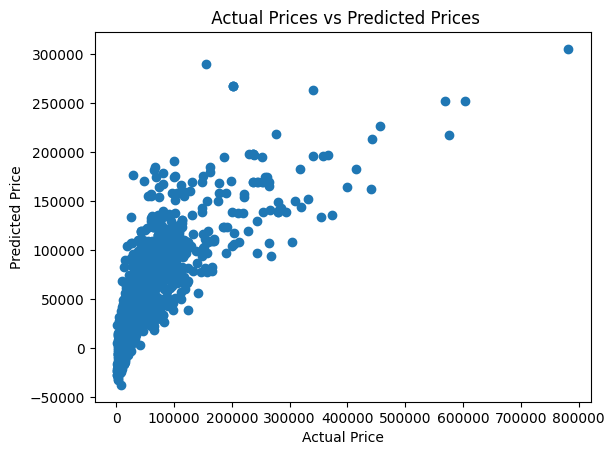

In [352]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [353]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [354]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.5943189376708747


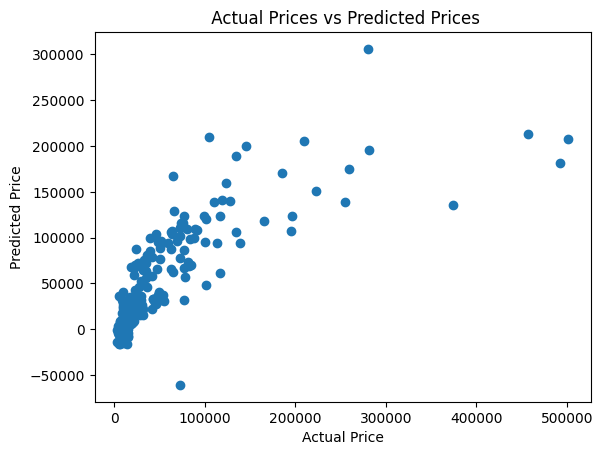

In [355]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()